#### Name: Akshat Bhat

#### UID: 2018130003

#### Roll No. 5

#### BE COMPS

## Exp 2] Implementing PCA using the Adult Census Income dataset

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Loading the dataset

In [143]:
df = pd.read_csv('adult.csv')

In [144]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that some columns have no null values which need to be handled. But the cell above shows that the dataset contains values coded as '?'.

In [146]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (32561, 15)


The dataset has 32561 rows and 15 columns

In [147]:
df.dtypes.value_counts()

object    9
int64     6
dtype: int64

9 columns are categorical and the rest 6 are numeric columns

In [148]:
# Encoding '?' values as null values
df[df == '?'] = np.nan

In [149]:
nan_per = df.isna().sum()/len(df)*100

In [150]:
nan_per

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

The above Series shows the percentage of null values in each column

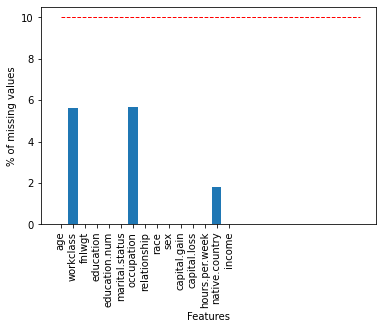

In [151]:
plt.plot([0, 25], [10,10], 'r--', lw=1)
plt.bar(range(len(nan_per)),nan_per)
plt.xlabel('Features')
plt.ylabel('% of missing values')
plt.xticks(list(range(len(df.columns))),list(df.columns.values),rotation='vertical')
plt.show()

The graph shows the percentage of missing values in each feature, most of the features have less than 10% missing values.

### Handling missing values

As **workclass**, **occupation** and **native_country** are categorical columns we will remove the null values using imputation by mode

In [152]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [153]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

All null values have been handled

### Exploratory Data Analysis

In [154]:
df['income'].value_counts() # Target Variable

<=50K    24720
>50K      7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

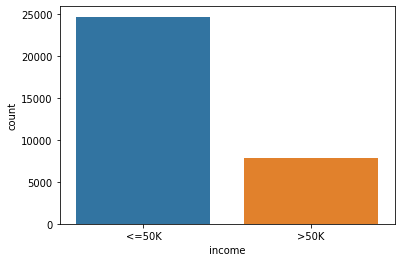

In [155]:
sns.countplot(data=df,x='income')

The dataset is a bit skewed as the distribution of the target variable is not uniform

<AxesSubplot:xlabel='income', ylabel='count'>

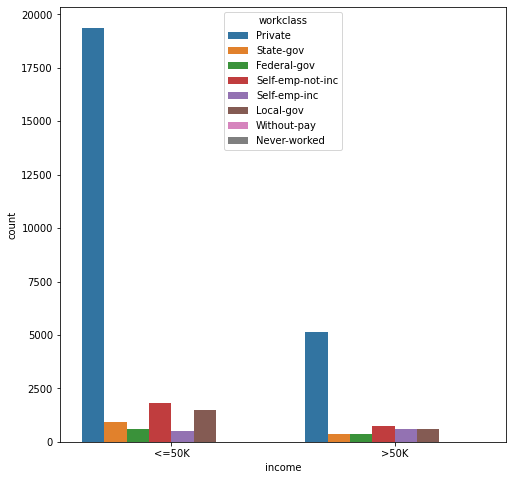

In [156]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='income', hue='workclass')

A large number of people who work in the private sector earn a lot more than people who work in other sectors

<AxesSubplot:xlabel='income', ylabel='count'>

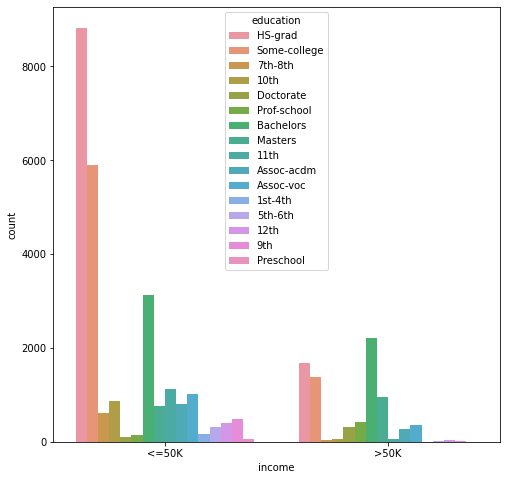

In [157]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='income', hue='education')

People who have studied atleast upto some college or have completed graduation, are expected to earn more than the rest

The maximum age is 90
The minimum age is 17


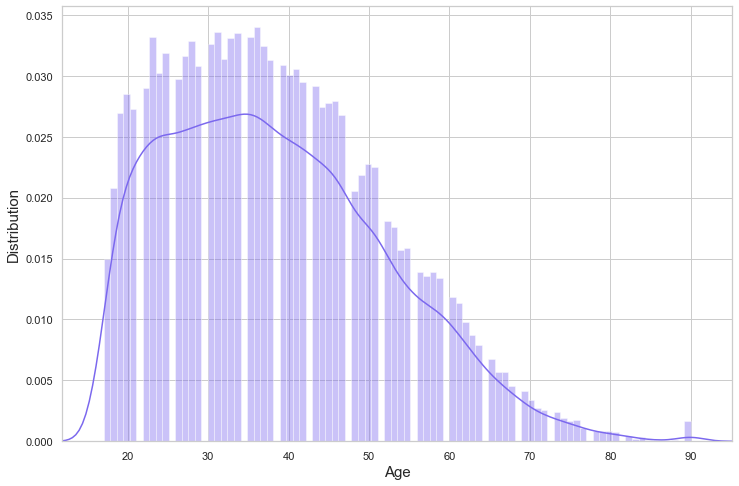

In [165]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

The above plot shows the distribution of Age of people across the Data Set

<AxesSubplot:xlabel='income', ylabel='count'>

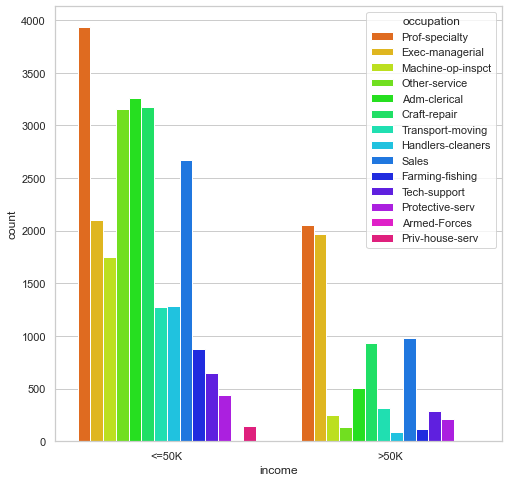

In [168]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='income', hue='occupation',palette='hsv')

The above plot shows the number of people segregated into two income classes based on their occupation

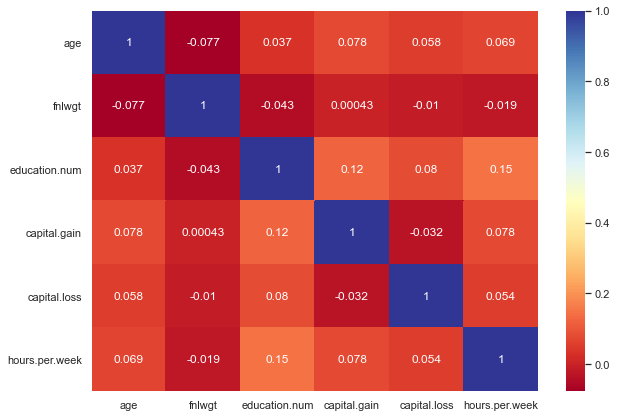

In [187]:
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlBu');

We can see that there is not much correlation between input features

### Feature Engineering

Before converting categorical columns, we need to split the set into training and testing sets in order to avoid data leakage and overly optimistic model performance.

Reference: https://towardsdatascience.com/avoid-data-leakage-split-your-data-before-processing-a7f172632b00

In [181]:
X = df.drop(['income'], axis=1)
y = df['income']

X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Converting categorical columns to numeric using label encoding

In [183]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

#### Checking the correlation of input features

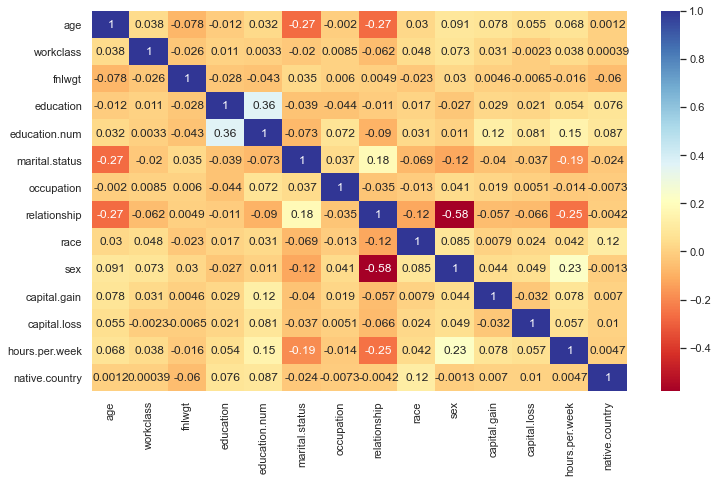

In [190]:
plt.rcParams['figure.figsize'] = [12,7]
sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlBu');

We can see that 'education' and 'education.num' are more correlated than any other pair of input features

In [200]:
X_train_corr = X_train.copy()

In [207]:
X_train_corr['income'] = y_train
X_train_corr['income'] = X_train_corr['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [208]:
X_train_corr['income'].unique()

array([0, 1], dtype=int64)

#### Checking the correlation of features with target

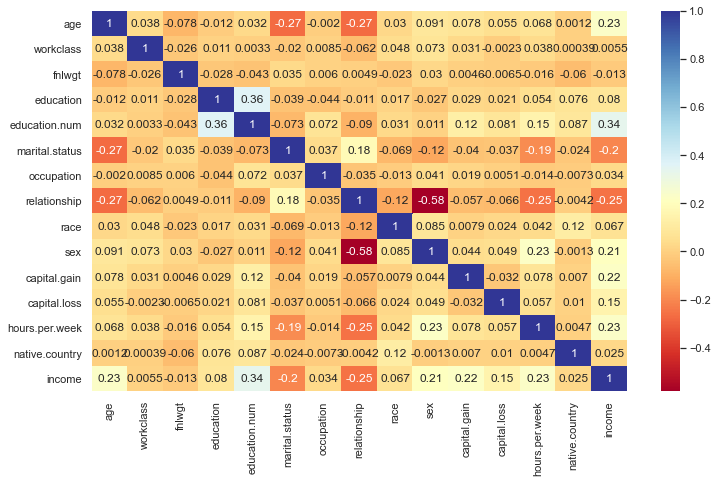

In [210]:
plt.rcParams['figure.figsize'] = [15
                                  ,7]
sns.heatmap(X_train_corr.corr(), annot = True, cmap = 'RdYlBu');

We can see that 'education.num' has the most correlation with the target variable 'income'

#### Feature Scaling using Standard Scaler

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [215]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


### Model Selection/Training

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8217


Without PCA the model gives an **accuracy** of **82.17%**

### PCA

In [217]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

In [218]:
explained_variance_ratio

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

Above we can see the explained variance ratio of each principal component. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [219]:
explained_variance_ratio[:-1].sum()*100

97.25845155276271

We can see that approximately 97.25% of variance is explained by the first 13 variables. Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information.

Dropping it to see if accuracy improves, training the model again and calculating the accuracy.

#### Logistic Regression using only first 13 variables

In [220]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8213


After using PCA, keeping first 13 variables, the model gives an **accuracy** of **82.13%**. We can see that the accuracy decreased.

Only 7% of variance is explained by the last two variables.
Dropping both to see if accuracy improves, training the model again and calculating the accuracy.

#### Logistic Regression using only first 12 variables

In [221]:
X = df.drop(['income','native.country','hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8227


After using PCA, keeping first 12 variables, the model gives an **accuracy** of **82.27%**. We can see that the accuracy increased.

### Model Evaluation

In [222]:
from sklearn import metrics
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
print('Classification Report\n',classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      7410
        >50K       0.72      0.43      0.54      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Confusion Matrix
 [[7012  398]
 [1334 1025]]
Accuracy: 0.8227044733340158



For the sake of experimenting, we can try keeping only the first 11 variables. 11.83% of variance is explained by the last three variables.

Dropping them to see if accuracy improves, training the model again and calculating the accuracy.

#### Logistic Regression using only first 11 variables

In [223]:
X = df.drop(['income','native.country','hours.per.week','capital.loss'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8186


After using PCA, keeping first 11 variables, the model gives an **accuracy** of **81.86%**. We can see that the accuracy decreased again.

We can infer that using the **first 12 variables** as features gives us the best **accuracy** of **82.27%**. The process of reducing the feature that contributes less to the variance and doing it over and over again is an arduous task.

In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

#### Computing the minimum number of dimensions required to preserve 90% of the training set variance

In [224]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


#### Plotting cumulative explained variance vs the number of dimensions (Scree Plot)

An alternative option is to plot the explained variance as a function of the number of dimensions. In the plot, we should look for an elbow where the explained variance stops growing fast. This can be thought of as the intrinsic dimensionality of the dataset.

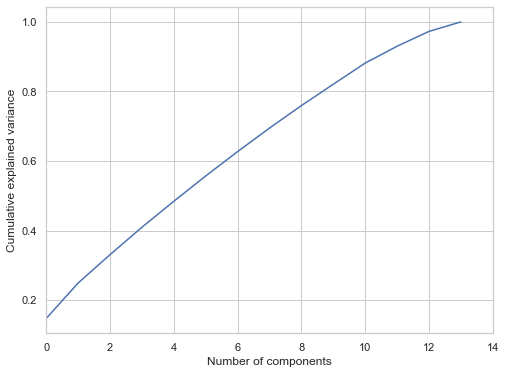

In [225]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The plot shows that almost 90% of variance is explained by the first 12 components.

#### PCA keeping only 12 components

In [226]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)


pca = PCA(12)
pca.fit(X_train)
# access values and vectors
pca_components = pca.components_
print('Eigen Vectors:\n',pca_components)
print('Eigen Values:\n',pca.explained_variance_)

Eigen Vectors:
 [[ 3.17104903e-01  1.09075376e-01 -5.00794765e-02  1.06175944e-01
   2.10063637e-01 -3.34890542e-01  2.94832578e-02 -5.40978653e-01
   1.68492082e-01  4.70331199e-01  1.40363966e-01  1.20997604e-01
   3.69473872e-01  5.92094826e-02]
 [ 8.13484138e-02  3.60205398e-02  1.45474086e-01 -6.08661264e-01
  -6.07041594e-01  1.46630574e-02  8.82657122e-03 -2.12942113e-01
  -3.86943891e-02  2.83317485e-01 -1.53172111e-01 -7.67499255e-02
  -5.65766791e-02 -2.68323941e-01]
 [-4.43799644e-01 -2.07950977e-02  4.62523885e-01  1.26087740e-01
   2.09736972e-01  3.98385098e-01  3.51708880e-01 -1.45420021e-01
  -2.09500293e-01  2.89333131e-01  1.11666541e-01  3.87568976e-04
   1.40058924e-01 -2.56020454e-01]
 [ 3.41265824e-01 -1.79750734e-01  3.78542917e-02  2.35753516e-02
   8.36074113e-02 -2.83176701e-01 -3.25509212e-02  9.44272430e-02
  -5.92170277e-01 -1.91686614e-01  2.81706961e-01 -2.27927666e-02
   9.38697828e-02 -5.25341797e-01]
 [ 8.66193179e-02  4.41223804e-01 -1.87471667e-01 -1

In [227]:
transformed_X_train = pca.transform(X_train)
print('Projection of the original matrix:\n',transformed_X_train)

Projection of the original matrix:
 [[-1.74453448 -1.44372786 -2.16422698 ...  0.04136948  0.08763314
  -0.49169461]
 [ 0.62223658  0.49117863  0.13352266 ... -0.47499948  0.36967462
  -0.38769783]
 [-0.64701057 -1.08115659 -0.39157213 ... -0.60731136  0.39256223
   1.03646263]
 ...
 [-0.81413697  1.67337571  0.77139075 ...  0.98860416 -1.56954208
   0.04683507]
 [ 1.46535949 -0.93546551 -0.39705611 ... -0.64164019  0.40521065
  -0.0545075 ]
 [ 0.9935644   0.36895764 -0.17597071 ... -0.64144046  0.05838336
  -0.46921897]]


In [228]:
transformed_X_test = pca.transform(X_test)

In [229]:
len(transformed_X_test[0])

12

In [230]:
logreg = LogisticRegression()
logreg.fit(transformed_X_train, y_train)
y_pred = logreg.predict(transformed_X_test)

In [231]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'] # Solver algorithms used to solve logistic regression as an optimisation problem
penalty = ['l2'] # Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. It reduces parameters and shrinks (simplifies) the model. 
c_values = [100, 10, 1.0, 0.1, 0.01] # Parameter - Inverse of regularization strength and Smaller values have more regularization

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # Repeats Stratified K-Fold n times with different randomization in each repetition
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(transformed_X_train, y_train)

print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_)) # Showing the best result and saving the other results and printing them
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.824705 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

0.824646 (0.006090) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824646 (0.006090) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824646 (0.006090) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.824661 (0.006098) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.824646 (0.006090) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.824661 (0.006122) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824661 (0.006122) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824661 (0.006122) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.824661 (0.006138) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.824661 (0.006122) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.824690 (0.006177) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824705 (0.006162) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.824661 (0.006132) with: {'C': 1.0, 'penalty'

In [232]:
grid_result

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [233]:
grid_result.best_estimator_

LogisticRegression()

In [234]:
final_model = grid_result.best_estimator_

### Model Evaluation

In [235]:
pred = final_model.predict(transformed_X_test)
print('Classification Report\n',classification_report(y_test, pred))
print('Confusion Matrix\n',confusion_matrix(y_test, pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Classification Report
               precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      7410
        >50K       0.72      0.43      0.54      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.80      9769

Confusion Matrix
 [[7010  400]
 [1350 1009]]
Accuracy: 0.8208619101238612


### Conclusion

- I understood how PCA works and how to apply it to the Adult Census Income dataset.
- From 14 features, if only first 12 are taken then the accuracy was found to be the highest(82.27%) as the number of dimensions required to preserve 90% of variance was found to be 12, which can further be confirmed by the scree plot.
- Interestingly, after PCA restricted to 12 principal components was applied, the accuracy was found to be lesser than when we had taken the first 12 features directly.